# Part 3: Machine learning

## Classification to predict the price

In [177]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [178]:
df=pd.read_excel("webscraping.xlsx")
df.head()

,Name,Type,City,Adults,Children,Latitude,Longitude
0,Récréalle Centre Récréatif,recreational,Alle-sur-Semois,20.0,20.0,49.842121,4.972678
1,Château de Jehay,cultural,Amay,5.0,3.0,50.549776,5.324099
2,Espace muséal d'Andenne - Le Phare,cultural,Andenne,8.0,0.0,50.489398,5.096547
3,Les Jardins d'eau d'Annevoie,natural,Annevoie,10.0,6.0,50.341611,4.838456
4,Dinant Evasion - Lesse kayaks,recreational,Anseremme (Dinant),25.5,25.5,50.237910,4.907923


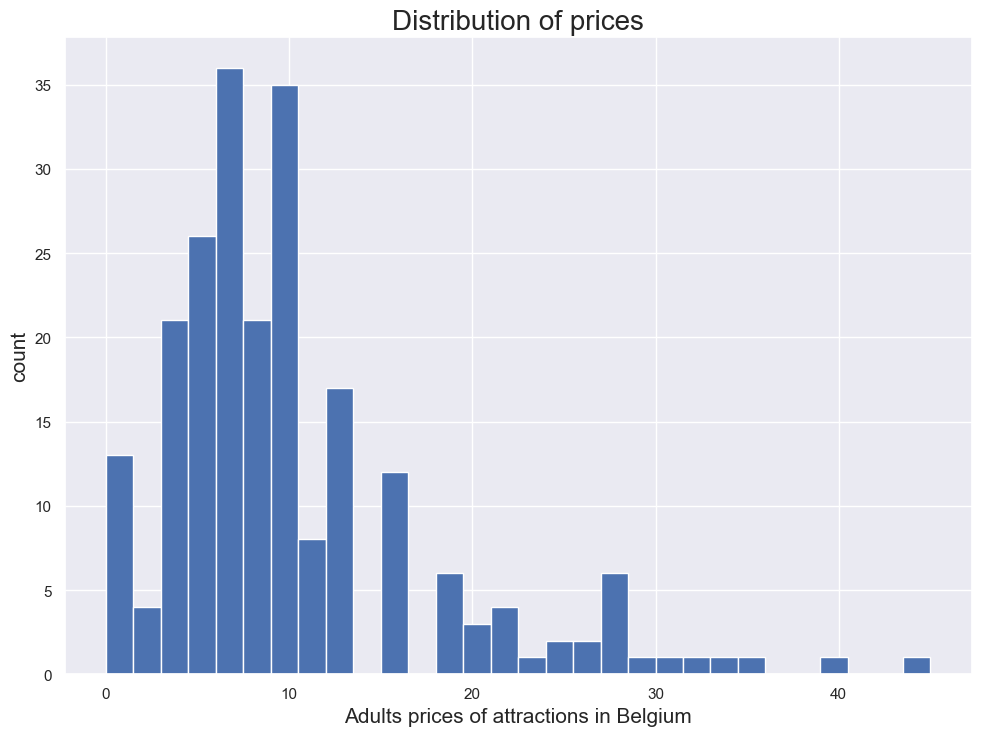

In [179]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
plt.hist(df['Adults'], bins=30)
plt.xlabel("Adults prices of attractions in Belgium", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of prices', size=20)
plt.show()

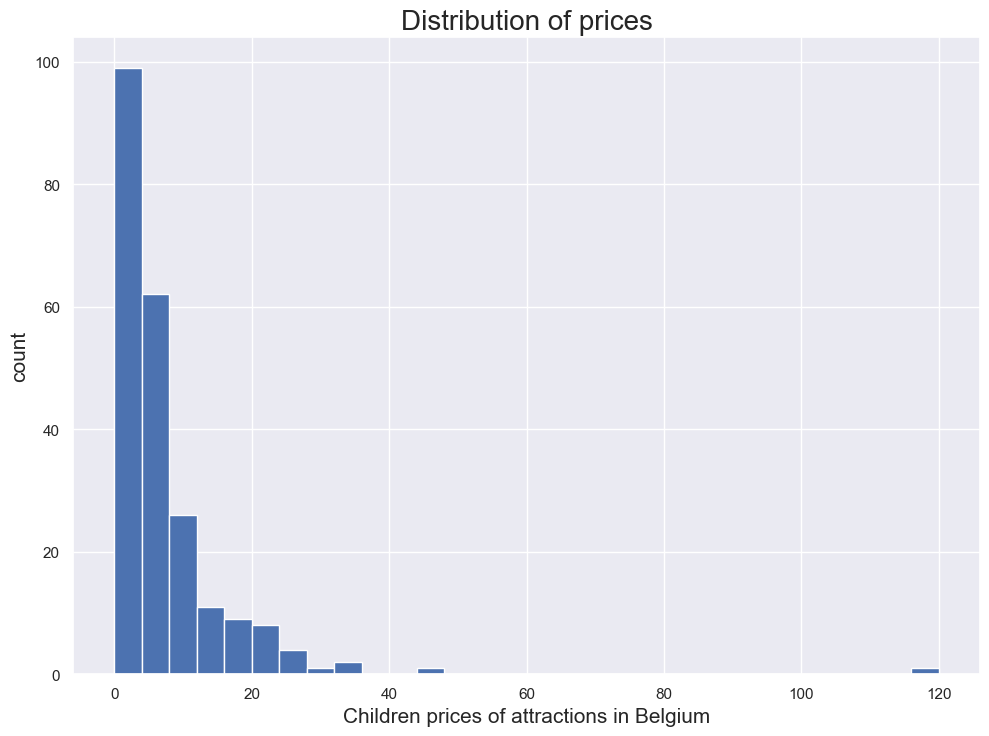

In [180]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
plt.hist(df['Children'], bins=30)
plt.xlabel("Children prices of attractions in Belgium", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of prices', size=20)
plt.show()

In [181]:
X = df[['City','Type']]
y = df['Adults']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [183]:
combined = pd.concat([X_train, X_test], axis=0)

In [184]:
categorical_cols = ['City','Type']

In [185]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

In [186]:
combined = preprocessor.fit_transform(combined).toarray()

In [187]:
X_train = combined[:len(X_train)]
X_test = combined[len(X_train):]

In [188]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [189]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.2743638986038087e+28


Predictions of the price of adults by linear regressions

In [190]:
X = df[['Type', 'City']]
y = df['Adults']

In [191]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [194]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [195]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 3.30544401289321
Test RMSE: 6.124317819075606
R-squared: -0.19660597974856953


In [196]:
new_data = [['natural', 'Charleroi']]
new_data = ct.transform(new_data)

# Predict the price for children
predicted_price = model.predict(new_data)
print("Predicted Price for Adults:", predicted_price)

Predicted Price for Adults: [6.92805529]


C:\Users\schmi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [197]:
unique_types = df['Type'].unique()
unique_cities = df['City'].unique()
combinations = list(itertools.product(unique_types, unique_cities))
predict_df_adults = pd.DataFrame(combinations, columns=['Type', 'City'])
predict_data = ct.transform(predict_df_adults)
predicted_prices = model.predict(predict_data)
predict_df_adults['Predicted Adults Prices'] = predicted_prices

predict_df_adults = predict_df_adults[['City', 'Type', 'Predicted Adults Prices']]

print(predict_df_adults)

                   City          Type  Predicted Adults Prices
0       Alle-sur-Semois  recreational                19.999995
1                  Amay  recreational                14.382450
2               Andenne  recreational                17.382450
3              Annevoie  recreational                15.454400
4    Anseremme (Dinant)  recreational                25.499995
..                  ...           ...                      ...
367              Waimes       natural                 5.999998
368            Waterloo       natural                13.928048
369               Wavre       natural                39.545593
370              Wépion       natural                 8.928048
371      Wéris (Durbuy)       natural                 6.928048

[372 rows x 3 columns]


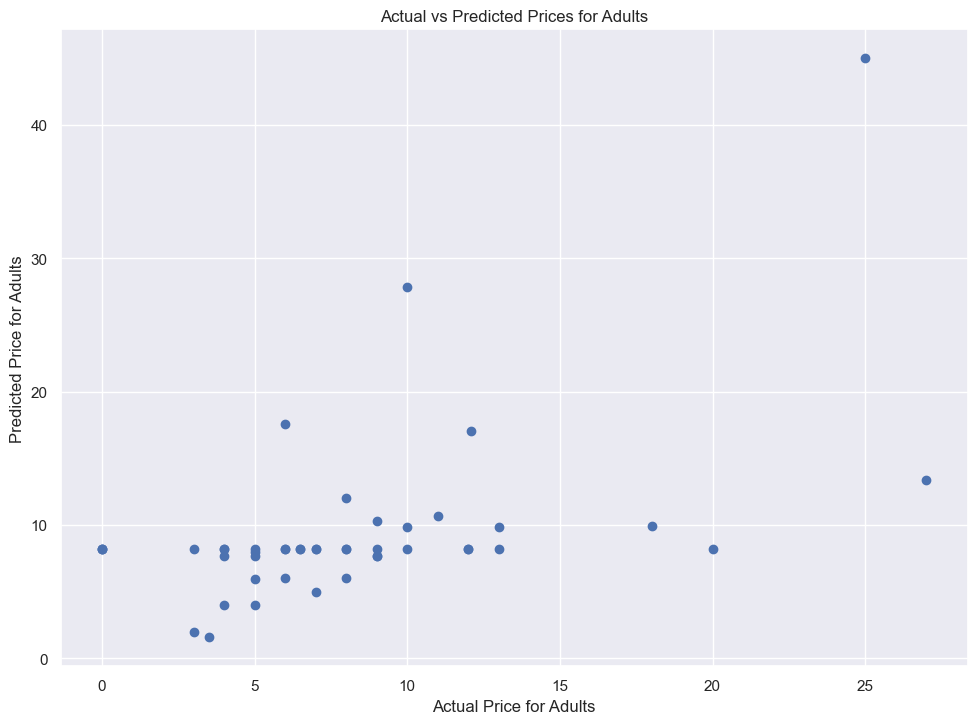

In [198]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Price for Adults')
plt.ylabel('Predicted Price for Adults')
plt.title('Actual vs Predicted Prices for Adults')
plt.show()

## Predictions of the price of children by linear regressions

In [199]:
X = df[['Type', 'City']]
y = df['Children']

In [200]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [201]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [202]:
new_data = [['natural', 'Charleroi']]  # Provide the type and city values for prediction
new_data = ct.transform(new_data)
predicted_price = model.predict(new_data)
print("Predicted Price for Children:", predicted_price)

Predicted Price for Children: [2.60816059]


C:\Users\schmi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [203]:
unique_types = df['Type'].unique()
unique_cities = df['City'].unique()
combinations = list(itertools.product(unique_types, unique_cities))
predict_df_children = pd.DataFrame(combinations, columns=['Type', 'City'])
predict_data = ct.transform(predict_df_children)
predicted_prices = model.predict(predict_data)
predict_df_children['Predicted Prices for Children'] = predicted_prices

predict_df_children = predict_df_children[['City', 'Type', 'Predicted Prices for Children']]

print(predict_df_children)

                   City          Type  Predicted Prices for Children
0       Alle-sur-Semois  recreational                      19.999995
1                  Amay  recreational                      11.624956
2               Andenne  recreational                       8.624956
3              Annevoie  recreational                      12.016779
4    Anseremme (Dinant)  recreational                      25.499995
..                  ...           ...                            ...
367              Waimes       natural                       2.999988
368            Waterloo       natural                      10.608164
369               Wavre       natural                      28.983187
370              Wépion       natural                       6.608164
371      Wéris (Durbuy)       natural                       4.608164

[372 rows x 3 columns]


In [204]:
predict_df = predict_df_adults.merge(predict_df_children, on=['Type', 'City'])
predict_df.sort_values(by='City', inplace=True)
print(predict_df)

                City          Type  Predicted Adults Prices  \
0    Alle-sur-Semois  recreational                19.999995   
248  Alle-sur-Semois       natural                14.545593   
124  Alle-sur-Semois      cultural                10.617541   
1               Amay  recreational                14.382450   
249             Amay       natural                 8.928048   
..               ...           ...                      ...   
122           Wépion  recreational                14.382450   
246           Wépion      cultural                 4.999997   
247   Wéris (Durbuy)      cultural                 2.999997   
123   Wéris (Durbuy)  recreational                12.382450   
371   Wéris (Durbuy)       natural                 6.928048   

     Predicted Prices for Children  
0                        19.999995  
248                      13.983204  
124                      11.375035  
1                        11.624956  
249                       5.608164  
..                   

In [205]:
predict_df

,City,Type,Predicted Adults Prices,Predicted Prices for Children
0,Alle-sur-Semois,recreational,19.999995,19.999995
248,Alle-sur-Semois,natural,14.545593,13.983204
124,Alle-sur-Semois,cultural,10.617541,11.375035
1,Amay,recreational,14.382450,11.624956
249,Amay,natural,8.928048,5.608164
...,...,...,...,...
122,Wépion,recreational,14.382450,12.624956
246,Wépion,cultural,4.999997,3.999995
247,Wéris (Durbuy),cultural,2.999997,1.999995
123,Wéris (Durbuy),recreational,12.382450,10.624956


In [218]:
df2=predict_df

In [219]:
df2.to_excel('predict_df.xlsx', index=False)

In [216]:
# Create an ExcelWriter object
writer = pd.ExcelWriter('data_project_df.xlsx', engine='xlsxwriter')

# Export the first DataFrame to the default sheet
webscraping.to_excel(writer, index=False, sheet_name='Webscraping')

# Export the second DataFrame to a new sheet
predict_df.to_excel(writer, index=False, sheet_name='price prediction')

# Save the Excel file
writer.save()

NameError: name 'webscraping' is not defined

essai d'autres trucs

In [206]:
X = df[['Type', 'City']]
y = df['Adults']

In [207]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [210]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [211]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 3.30544401289321
Test RMSE: 6.124317819075606
R-squared: -0.19660597974856953
